# 4 задание 
#### Подбор параметров динамической системы методом MCMC

Требуется найти параметры системы Хищник-Жертва при помощи метода MCMC. 
Результатом является записная книжка Python Notebook в которой: 

1)Задаются параметры системы Хищник-Жертва 

2)Решается прямая задача и генерируются данные 

3)К данными применяется зашумление 

4)Методом MCMC оцениваются параметры системы по зашумленным данным 

# Решение
Система Хищник-Жертва

$ dx/dt = x ( \alpha - \beta y ) $

$ dy/dt = -y( \gamma - \delta x ) $

 $\alpha$  — коэффициент рождаемости жертв, x — величина популяции жертв, dx/dt  — скорость прироста популяции жертв,
 $\gamma$  — коэффициент убыли хищников, y — величина популяции хищников, dy/dt — скорость прироста популяции хищников.
 
 При встречах хищников и жертв (частота которых прямо пропорциональна величине xy) происходит убийство жертв с коэффициентом $\beta$ , сытые хищники способны к воспроизводству с коэффициентом $\delta$ . 

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Задаются параметры системы Хищник-Жертва
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [3]:
#define the time stepping scheme - euler forward, as used in earlier lessons
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [4]:
# define the function that represents the Lotka-Volterra equations
def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return numpy.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

In [5]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# set initial conditions
u_euler = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [6]:
time = numpy.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'модель Хищник-Жертва')

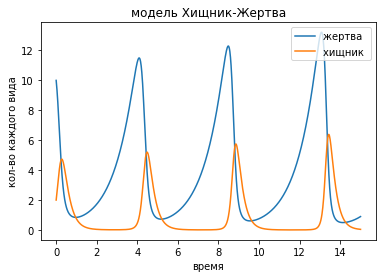

In [11]:
plt.plot(time, x_euler, label = 'жертва ')
plt.plot(time, y_euler, label = 'хищник ')
plt.legend(loc='upper right')
#labels
plt.xlabel("время")
plt.ylabel("кол-во каждого вида")
#title
plt.title("модель Хищник-Жертва")


